In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
train_dataset=pd.read_csv('train.csv')
train_dataset.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [22]:
train_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From this above dataset these below features does not give any value to create a model

--PassengerId

--Name

--Ticket

--Fare

In [23]:
train_dataset.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],inplace=True)

In [145]:
test_dataset=pd.read_csv('test.csv')
test_dataset.head(n=4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [146]:
train_dataset.head(n=4)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S


In [78]:
train_dataset.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [79]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [148]:
train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [81]:
train_dataset[train_dataset['Age'].isna()]

,Survived,Pclass,Sex,Age,Fare,Embarked
5,0,3,male,NaN,8.4583,Q
17,1,2,male,NaN,13.0000,S
19,1,3,female,NaN,7.2250,C
26,0,3,male,NaN,7.2250,C
28,1,3,female,NaN,7.8792,Q
...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,C
863,0,3,female,NaN,69.5500,S
868,0,3,male,NaN,9.5000,S
878,0,3,male,NaN,7.8958,S


In [147]:
train_dataset.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
#Predict age taking features Pclass, Sex, Fare and Embarked

In [31]:
train_dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [36]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 25
    else:
        return Age

In [39]:
train_dataset[['Age','Pclass']].apply(age,axis=1).isnull().sum()

0

In [83]:
def age_change(dataset):
    if dataset['Pclass']==1:
        return 39
    elif dataset['Pclass']==2:
        return 29
    elif dataset['Pclass']==3:
        return 25

In [97]:
age_null=train_dataset[train_dataset['Age'].isnull()].apply(age_change,axis=1).values

In [98]:
train_dataset.loc[train_dataset['Age'].isnull(),'Age']=age_null

#### Another way to fill the missing value in Age column 

In [174]:
age_nan_test_df=train_dataset.loc[train_dataset['Age'].isnull(),'Pclass':]

In [175]:
age_nan_train_df=train_dataset.loc[~train_dataset['Age'].isnull(),'Pclass':]

In [176]:
age_nan_test_df.shape

(177, 5)

In [177]:
age_nan_train_df.shape

(714, 5)

In [178]:
age_nan_train_df.head(n=4)

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S


In [181]:
age_nan_train_df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [182]:
age_nan_train_df.dropna(inplace=True)

In [183]:
age_nan_train_df.shape

(712, 5)

In [184]:
age_nan_train_df.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

In [187]:
age_nan_train_df_dummies=pd.get_dummies(columns=['Sex','Embarked'],data=age_nan_train_df)

In [189]:
age_nan_train_df_dummies.head(n=4)

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1


In [190]:
X=age_nan_train_df_dummies.drop(columns='Age',axis=1)
y=age_nan_train_df_dummies['Age']

In [191]:
X.shape,y.shape

((712, 7), (712,))

In [192]:
from sklearn.linear_model import LinearRegression
age_model_lr=LinearRegression()

In [193]:
age_model_lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
age_nan_test_df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
dtype: int64

In [195]:
X_test=age_nan_test_df.drop(columns='Age',axis=1)

In [198]:
X_test_dummies=pd.get_dummies(columns=['Sex','Embarked'],data=X_test)

In [199]:
X_test_dummies.shape

(177, 7)

In [203]:
age_predict=np.round(age_model_lr.predict(X_test_dummies),2)

In [204]:
train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [208]:
train_dataset.loc[train_dataset['Age'].isna(),'Age']=age_predict

In [209]:
train_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [210]:
train_dataset.dropna(inplace=True)

In [211]:
train_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [180]:
train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [119]:
train_dataset.dropna(inplace=True)

In [121]:
#train_dataset['Age']=train_dataset['Age'].fillna(train_dataset['Age'].mean())
#train_dataset['Embarked']=train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0])
#train_dataset['Cabin']=train_dataset['Cabin'].fillna(train_dataset['Cabin'].mode()[0])

In [122]:
#train_dataset['Cabin'].value_counts().sort_values(ascending=False)

In [123]:
train_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

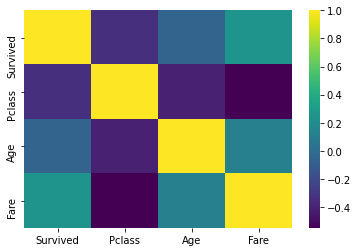

In [124]:
#Check correlaton of all features
sns.heatmap(train_dataset.corr(),cmap='viridis')

In [125]:
train_dataset.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.335549,-0.054357,0.255290
Pclass,-0.335549,1.000000,-0.404279,-0.548193
Age,-0.054357,-0.404279,1.000000,0.119916
Fare,0.255290,-0.548193,0.119916,1.000000


In [126]:
train_dataset.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

In [212]:
train_dataset_dummies=pd.get_dummies(train_dataset,columns=['Sex','Embarked'],drop_first=True)

In [213]:
#train_dataset['Cabin'].unique()

In [214]:
X=train_dataset_dummies.drop('Survived',axis=1)
y=train_dataset_dummies['Survived']

In [215]:
X.shape, y.shape

((889, 6), (889,))

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(755, 6)
(134, 6)
(755,)
(755,)


In [217]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()

In [218]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
y_pred=model_lr.predict(X_test)

In [220]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [221]:
print("Confusion Metrics is : ")
confusion_matrix(y_test,y_pred)

Confusion Metrics is : 


array([[82, 11],
       [14, 27]])

In [222]:
print("Classificaton Report is ")
print(classification_report(y_test,y_pred))

Classificaton Report is 
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        93
           1       0.71      0.66      0.68        41

    accuracy                           0.81       134
   macro avg       0.78      0.77      0.78       134
weighted avg       0.81      0.81      0.81       134



In [223]:
print(f"Accuracy is : {accuracy_score(y_pred,y_test)}")

Accuracy is : 0.8134328358208955


In [224]:
model_lr.coef_

array([[-1.17292425e+00, -2.93816467e-02, -4.98953433e-04,
        -2.50927380e+00, -9.53533243e-02, -5.24087115e-01]])

In [225]:
model_lr.intercept_

array([4.98221186])

In [226]:
model_lr.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [227]:
model_lr.predict_proba(X_test)

array([[0.75187612, 0.24812388],
       [0.07858468, 0.92141532],
       [0.51096629, 0.48903371],
       [0.91655984, 0.08344016],
       [0.05885975, 0.94114025],
       [0.81493488, 0.18506512],
       [0.34246919, 0.65753081],
       [0.85340069, 0.14659931],
       [0.86321931, 0.13678069],
       [0.32809624, 0.67190376],
       [0.69840844, 0.30159156],
       [0.05933157, 0.94066843],
       [0.8882476 , 0.1117524 ],
       [0.31501367, 0.68498633],
       [0.80320566, 0.19679434],
       [0.61035869, 0.38964131],
       [0.91195834, 0.08804166],
       [0.77109126, 0.22890874],
       [0.8522598 , 0.1477402 ],
       [0.94762731, 0.05237269],
       [0.74090646, 0.25909354],
       [0.91214689, 0.08785311],
       [0.6363356 , 0.3636644 ],
       [0.90709289, 0.09290711],
       [0.3087642 , 0.6912358 ],
       [0.45824844, 0.54175156],
       [0.22184108, 0.77815892],
       [0.83878015, 0.16121985],
       [0.87912673, 0.12087327],
       [0.21812657, 0.78187343],
       [0.

In [52]:
#Default threshold is set as 0.5, if you want to change the default value and predict X_test then you have to do programming

#### Problem Statement: The Iris plant has 3 species - Iris Setosa, Iris Versicolour, Iris Virginica

One class is linearly separable from the other two; the latter are not linearly separable from each other.

Objective:

• Import the iris dataset using sklearn

• Use logistic regression to predict the class of iris plant

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [8]:
df['Class']=iris.target

In [10]:
df['Class'].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [12]:
features=df.drop(columns='Class',axis=1)
target=df['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [14]:
from sklearn.linear_model import LogisticRegression
model_lr_iris=LogisticRegression()
model_lr_iris.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_predict_iris=model_lr_iris.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Confusion Metrix")
print(confusion_matrix(y_test,y_predict_iris))
print("Classification Report")
print(classification_report(y_test,y_predict_iris))
print(f"Accuracy Score is {accuracy_score(y_test,y_predict_iris)}")

Confusion Metrix
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Accuracy Score is 0.9333333333333333
